# Singular Value Decomposition ve PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA        
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sbn

In [2]:
def sample_class(mean, cov, size):
    class1 = scipy.stats.multivariate_normal(mean, cov)
    return class1.rvs(size=size)



In [3]:
mean = [4.0,3.0,2.0]

cov = [[3.0, 2.3, -1.0],
       [2.3, 4,   -3.0],
       [-1.0,-3.0, 6]]


data = sample_class(mean, cov, 1000)

df = pd.DataFrame({
    'f1':data[:,0],
    'f2':data[:,1],
    'f3':data[:,2],
})

print (df)

           f1        f2        f3
0    3.807925  2.741094  5.166973
1    4.099730  2.069295  2.281294
2    4.456758  4.013860  3.482311
3    3.249105  2.158540  1.549814
4    1.482379 -2.122018  6.477500
..        ...       ...       ...
995  5.454549  2.491611  3.159931
996  5.087430  2.552602  4.331787
997  5.242929  2.092540  3.692836
998  4.097970  3.801357  0.480872
999  3.778453  1.014603  3.620402

[1000 rows x 3 columns]


[[ 1.          0.65003067 -0.25466526]
 [ 0.65003067  1.         -0.6569894 ]
 [-0.25466526 -0.6569894   1.        ]]


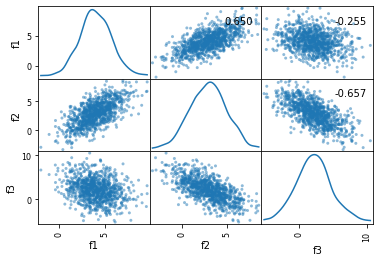

In [4]:
axes = scatter_matrix(df, alpha=0.5, diagonal='kde')
corr = df.corr().values
print (corr)
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %(corr[i,j]), (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

Bu veri setine bagli yeni bir matematiksel model dusunelim.

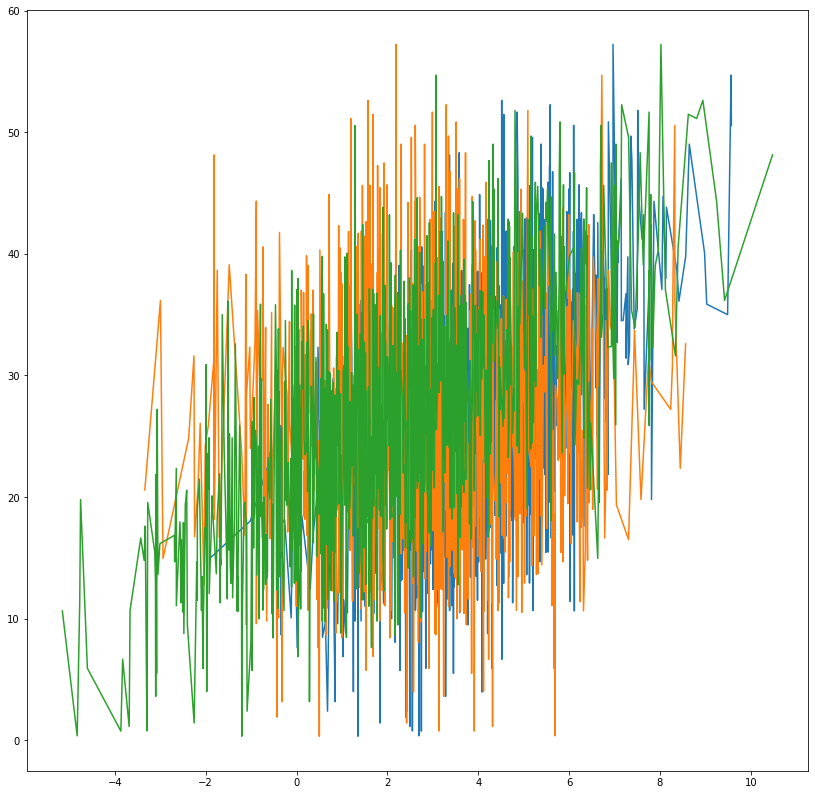

In [5]:
y = 3*df.f1 + 2*df.f2 + 4*df.f3 + np.random.randn(len(df.f1))*0.2

f1_index = np.argsort(df.f1)
f2_index = np.argsort(df.f2)
f3_index = np.argsort(df.f3)


plt.figure(figsize=(14,14))
plt.plot(df.f1[f1_index],y[f1_index])
plt.plot(df.f2[f2_index],y[f2_index])
plt.plot(df.f3[f3_index],y[f3_index])

In [6]:
X = np.copy(df.values)

##normalize data


X = X - np.mean(X, axis=0)


cov_estimate = np.dot(X.T, X) / X.shape[0]
print (np.array(cov),'\n',cov_estimate)

lam, eig = np.linalg.eig(cov)


[[ 3.   2.3 -1. ]
 [ 2.3  4.  -3. ]
 [-1.  -3.   6. ]] 
 [[ 2.81967867  2.20452179 -1.06976389]
 [ 2.20452179  4.07907297 -3.31938415]
 [-1.06976389 -3.31938415  6.25801837]]


In [7]:
print (lam,' Total Variance ', np.sum(lam))
print ('Total Variance of original data distribution ', np.sum(np.diag(cov)))
print ('Total Variance of estimated covariance', np.sum(np.diag(cov_estimate)))


print (eig)

[8.97189187 3.23313746 0.79497066]  Total Variance  13.000000000000012
Total Variance of original data distribution  13.0
Total Variance of estimated covariance 13.156770010341532
[[-0.35083834 -0.70112713 -0.62075213]
 [-0.59741397 -0.3428864   0.72493135]
 [ 0.7211165  -0.62517971  0.29856545]]


(1000, 3)
          pc1       pc2       pc3
pc1  9.391943 -0.216520 -0.100647
pc2 -0.216520  3.013655  0.046932
pc3 -0.100647  0.046932  0.764342


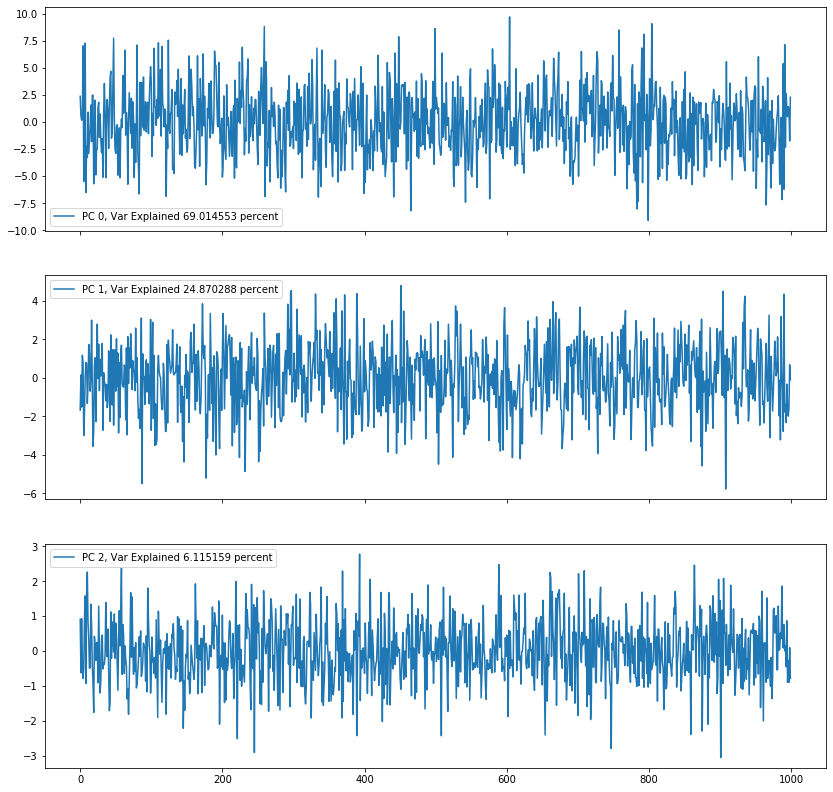

In [8]:
pcs = np.dot(eig.T, X.T).T

pcsdf = pd.DataFrame({
    'pc1':pcs[:,0],
    'pc2':pcs[:,1],
    'pc3':pcs[:,2],
})

print (pcs.shape)

fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True,squeeze=True, figsize=(14,14))

for i in range(3):
    axes[i].plot(pcs[:,i], label='PC %d, Var Explained %f percent' % (i, 100*lam[i]/np.sum(lam)))
    axes[i].legend()

print (pcsdf.cov())


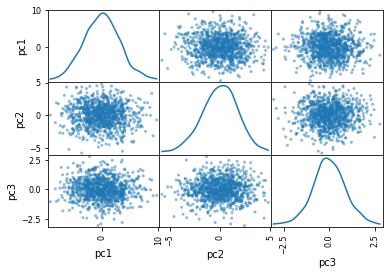

In [9]:
axes = scatter_matrix(pcsdf, alpha=0.5, diagonal='kde')

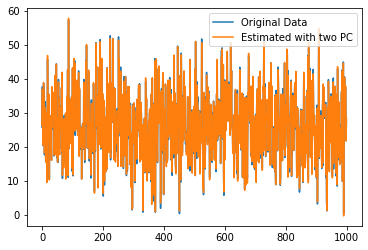

In [10]:
X = pcsdf[['pc1','pc2']].values

y_mean = np.mean(y)


betas = np.linalg.lstsq(X,y-y_mean,rcond=None)[0]

y_est = np.dot(X,betas)

plt.plot(y,label='Original Data')
plt.plot(y_est+y_mean,label='Estimated with two PC')
plt.legend()

Resim Sıkıştırma

384 384


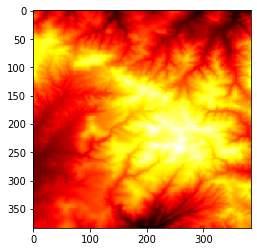

In [11]:
import rasterio as rio

with rio.open('dted.tif') as d:
    dted = d.read(1)

    
dted = dted[0:6*64, 0:6*64] ## Clip to be compatible with 64x64 tiles
width = dted.shape[1]
height = dted.shape[0]

print (width, height)
    
plt.imshow(dted,cmap='hot')



0 0 (4096,)
0 1 (4096,)
0 2 (4096,)
0 3 (4096,)
0 4 (4096,)
0 5 (4096,)
1 0 (4096,)
1 1 (4096,)
1 2 (4096,)
1 3 (4096,)
1 4 (4096,)
1 5 (4096,)
2 0 (4096,)
2 1 (4096,)
2 2 (4096,)
2 3 (4096,)
2 4 (4096,)
2 5 (4096,)
3 0 (4096,)
3 1 (4096,)
3 2 (4096,)
3 3 (4096,)
3 4 (4096,)
3 5 (4096,)
4 0 (4096,)
4 1 (4096,)
4 2 (4096,)
4 3 (4096,)
4 4 (4096,)
4 5 (4096,)
5 0 (4096,)
5 1 (4096,)
5 2 (4096,)
5 3 (4096,)
5 4 (4096,)
5 5 (4096,)
{'0,0': 0, '0,1': 1, '0,2': 2, '0,3': 3, '0,4': 4, '0,5': 5, '1,0': 6, '1,1': 7, '1,2': 8, '1,3': 9, '1,4': 10, '1,5': 11, '2,0': 12, '2,1': 13, '2,2': 14, '2,3': 15, '2,4': 16, '2,5': 17, '3,0': 18, '3,1': 19, '3,2': 20, '3,3': 21, '3,4': 22, '3,5': 23, '4,0': 24, '4,1': 25, '4,2': 26, '4,3': 27, '4,4': 28, '4,5': 29, '5,0': 30, '5,1': 31, '5,2': 32, '5,3': 33, '5,4': 34, '5,5': 35}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134307750>,
      dtype=object)

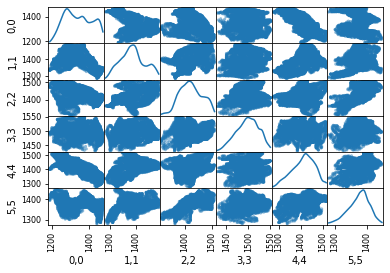

In [12]:
dted_df = {}

for i in range(6):
    for j in range(6):
        data = np.copy(dted[i*64:(i+1)*64,j*64:(j+1)*64].ravel())
        print (i, j, data.shape)
        dted_df['%d,%d' % (i,j)] = data

        
dted_df = pd.DataFrame(dted_df)


col_index = {
    cname:i for i,cname in enumerate(dted_df.columns)
}

print (col_index)

scatter_matrix(dted_df[['0,0','1,1','2,2','3,3','4,4','5,5']], alpha=0.5, diagonal='kde')

In [13]:
## Elimizdeki yeni degerlerin PCA analizini yapalim.
# Burada scikit learn kutuphanesini kullanacagiz


pca = PCA(svd_solver='full')
pca_components = pca.fit_transform(dted_df.values)

print (pca.explained_variance_)


[2.80574561e+04 1.46508313e+04 7.67079108e+03 5.02377309e+03
 3.88881478e+03 2.10304846e+03 1.73680430e+03 1.47229398e+03
 1.21960416e+03 8.98971338e+02 8.02632583e+02 6.73015583e+02
 6.00359336e+02 5.09899343e+02 4.42370755e+02 3.99126941e+02
 3.01102463e+02 2.82857650e+02 2.40125166e+02 2.20583878e+02
 2.07383725e+02 1.98433094e+02 1.77654274e+02 1.66554737e+02
 1.33093117e+02 1.29417476e+02 1.06589580e+02 1.05502425e+02
 9.48078252e+01 8.62526837e+01 7.21890613e+01 6.24162123e+01
 5.50355434e+01 4.19158621e+01 3.04924317e+01 1.87998446e+01]


In [14]:
print (pca_components.shape)

(4096, 36)


In [15]:
print (pca.components_.shape)

(36, 36)


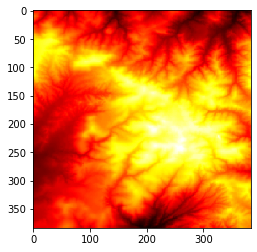

In [16]:
Z = pca_components

full_rc = pca.inverse_transform(Z)

dted_recovered = np.zeros((6*64, 6*64))

for i in range(6):
    for j in range(6):
        data = full_rc[:,col_index['%d,%d' % (i,j)]]
        dted_recovered[i*64:(i+1)*64,j*64:(j+1)*64] = data.reshape(64,64)

plt.imshow(dted_recovered,cmap='hot')




(4096, 1)
Compression ratio  = 36.000000


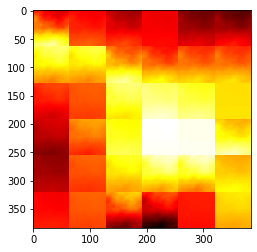

In [17]:
pca = PCA(n_components=1, svd_solver='full')
pca_components = pca.fit_transform(dted_df.values)

Z = pca_components

print (pca_components.shape)


print ('Compression ratio  = %f' % ( (dted.shape[0]*dted.shape[1])/(Z.shape[0]*Z.shape[1])))
## Gordugunuz gibi ayni veriyi daha az baz fonksiyonu ile ifade edebildik. 
## Bu da dimension reduction / compression'a bir ornek olarak gosterilebilir.

full_rc = pca.inverse_transform(Z)

dted_recovered = np.zeros((6*64, 6*64))

for i in range(6):
    for j in range(6):
        data = full_rc[:,col_index['%d,%d' % (i,j)]]
        dted_recovered[i*64:(i+1)*64,j*64:(j+1)*64] = data.reshape(64,64)

plt.imshow(dted_recovered,cmap='hot')




Singular Value Decomposition


Bir lineer regresyon probleminde oznitelikleri barindiran $X$ matrisi ve olcumler $y$ verildiginde parametrelerin hesaplanmasi icin aşağıdaki denklem sisteminin çözülmesi gerekmektedir.

$$
\beta = (X^TX)^{-1}X^Ty
$$


Ancak bazi durumlarda (ozellikle parametre sayisi veri sayisindan cok fazla ise veya oznitelikler arasinda ciddi korelasyonlar var ise) $X^TX$ matrisinin tersi alinamaz (singular matris). Bu durumda tam bir least squares cozumu olusturamayiz. Bu tur durumlarda oznitelikler arasinda veriyi en iyi aciklayan yonler kullanilarak yakin cozumler aranabilir.


Eger NxN'lik $X$ matrisi asagidaki gibi yazilabilirse.

$$
X = USV^T
$$

Burada:

- $U$: NxN orthonormal matrix, oyle ki kolonlarini olusturan baz vektorler tum veri uzayini tanimlar.
- $V$: MXM orthonormal matrix, oyle ki kolonlarini olusturan baz vektorler tum parametre uzayini tanimlar.
- $S$: min(M,N): diagonal elemanlari singular degerleri barindiran matrix


Bu tanimlama kullanilarak,

$$
X^TX = (VS^TU^T)USV^T
$$

seklinde yazilabildigini gorunuz. Burada $U^TU$, orthonormal matris oldugundan $I$ olur. $S^TS$ diyagonal elemanlari singular degerlerin karesi olan diyagonal bir matris olur. Bu durumda

$$
X^TX = V A V^T
$$

seklinde yazilabilir. $A$ matrisi eigen degerlerden olusan diyagonal bir matristir. Goruldugu gibi SVD ile eigen value ayristirmasi arasinda dogrudan bir iliski mevcuttur.

Singular degerler buyukten kucuge dogru siralanan pozitif degerlerdir ve temelde principal component'lerin varyanslarinin karekoklerini  barindirir. Bazi durumlarda ozellikle yuksek corelasyonlu verilerde (rank deficient) bazi singular degerler 0 veya 0'a cok yakindir. Bu durumda $S$ matrisi:

$$
S = \begin{bmatrix}
S_p & 0 \\
0 & 0 \\
\end{bmatrix}
$$

şeklinde yazılabilir. Boylece

$$
X = [U_1, U_2, ...,U_N]\begin{bmatrix}
S_p & 0 \\
0 & 0 \\
\end{bmatrix}[V_1, V_2, V_3, ..,V_M]^T
$$

Singular degerleri 0 olan elemanlari ayirir isek


$$
X = [U_p, U_0]\begin{bmatrix}
S_p & 0 \\
0 & 0 \\
\end{bmatrix}[V_p,V_0]^T
$$

singular degerlerin 0 oldugu bilesenler atildiginda $X$ matrisinin sikistirilmis versiyonunu elde ederiz.

$$
X_+ = U_p S_p V_p^T
$$


Bu durumda regresyon problemimizi sikistirilmis yeni matrisimiz ile ifade edebiliriz.

$$
y = X_+\beta + e
$$


Ya da singular degerler cinsinden

$$
y = U_p(S_p V_p^T\beta) + e
$$


Bu durumda olcumler $U_p$ matrisinin kolonlarini baz vektor alan bir uzayda ifade edilir ve bu baz vektor katsayilari $z= S_pV_p^T\beta$ ile ifade edilebilir.

$$
y = \sum_i^p z_i U_i
$$

Burada parametreler $z_i$ aslinda LS parametreleri olan $\beta$ vektorunun eigen vektorlerden olusan yeni uzaya dondurulmesi ve scale edilmesiyle olusur. Bu sekilde ifade edildiginde **Moon-Penrose Psudoinverse** asagidaki gibi yazilabilir.

$$
X^{+} = V_p S_p^{-1}U_p^T
$$


Bu pseudoinverse kullanilarak kestirilen yeni parametreler

$$
\hat{\beta} = V_p S_p^{-1}U_p^T y = \sum_i^p \frac{U_i^T y}{s_i}V_i
$$

seklinde yazilir. Ayrica Ridge regresyonu ile SVD arasinda da dogrudan bir bag bulunmaktadir. Ridge regresyonunu hatirlarsak, asagidaki gibi bir kosullu optimizasyon olarak yazilabildigini animsayabiliriz.

$$
argmin_\beta( (X\beta - y)^T(X\beta -y)), \text{           s.t.     } \beta^T\beta <= \epsilon
$$

Ya da

$$
argmin_\beta( (X\beta - y)^T(X\beta -y)) + \alpha^2 \beta^T\beta
$$

Yukaridaki denklem asagidaki gibi yazilabilir.

$$
\begin{bmatrix}
y\\
0\\
\end{bmatrix} = \begin{bmatrix}
X \\
\alpha I\\
\end{bmatrix} \beta + e
$$


Bu durumda cozum denklemi:

$$
(X^TX + \alpha^2I) \beta = X^Ty
$$

seklinde yazilabilir. $X$ matrisinin SVD dagilimini kullanarak yazar isek

$$
(VS^TU^TUSV^T + \alpha^2I)\beta = VS^TU^T y
$$

$U^TU = I$ ve $VV^T = I$ degerlerini kullanirsak

$$
(S^TS + \alpha^2I)\beta = S^TU^T y
$$

seklinde yazilabilir.

Bu durumda $S^TS + \alpha^2I$ diyagonal oldugundan parametrelerin bilesenlerini ayri ayri hesaplayabiliriz.

$$
\beta = \sum_i^p \frac{s_iU_i^T y}{s_i^2 + \alpha^2}V_i
$$

Eger bu esitlikte $f_i = \frac{s_i}{s_i^2+\alpha^2}$ degerini tanimlar isek


$$
\beta = \sum_i^p f_i U_i^T y V_i
$$

veya 

$$
V^T\beta = F U^T y
$$


seklinde Ridge regresyonu katsayilarini bulabiliriz. Burada $f_i$ degerleri filter faktor olarak adlandirilir ve cozum partial least squares (eger singular value $s_i = 0$ olanlari atar isek) veya damped SVD cozumu olarak adlandirilir.


In [18]:

# lets make the first problem rank deficient

df['f4'] = 10*df['f1']

df['f5'] = np.copy(df['f3'].values)

X = df.values

np.linalg.inv(np.dot(X.T,X))


params = np.linalg.lstsq(X,y,rcond=None)[0]


print ('params', params)

## Gercek parametreler 3*f1 + 2*f2 + 4*f3
## Aslinda feature sayisi fazla ama cok ciddi korelasyon var.

LinAlgError: Singular matrix

In [21]:
## Singular matrix oldugu icin tersini alamiyoruz

print ('rank is', np.linalg.matrix_rank(np.dot(X.T,X)))

## Aslinda gecerli parametre sayimiz 3

rank is 3


In [22]:
U,S,Vt = np.linalg.svd(X, compute_uv=True)

print ('Data space vectors are orthonormal' , np.diag(np.dot(U.T, U)))

Data space vectors are orthonormal [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 

In [23]:
# Model space vectors are orthonormal
print ('Model space vectors are orthonormal' , np.diag(np.dot(Vt, Vt.T)))


Model space vectors are orthonormal [1. 1. 1. 1. 1.]


In [24]:
##singular values

print (S)

## son degerin ne kadar sifira yakin olduguna bakiniz.

[1.38765733e+03 1.28976782e+02 3.74557061e+01 2.67323445e-14
 2.31785964e-14]


In [29]:

## Sadece 0 olmayan singular valuelar ile calisirsak
## Bir cesit dimension azaltma yapiyoruz aslinda

V_p = Vt.T

V_p = V_p[:,0:3]

U_p = U[:,0:3]

S_p = np.diag(1/S[0:3])

print (V_p.shape, U_p.shape, S_p.shape)

s = np.dot(S_p, np.dot(U_p.T,y))

print (s.shape,s)

betas = np.dot(V_p, s.ravel())

print (betas)


## Korele olan parametrelerin katsayilarina bakin. 
## Temel denklem singular olmasina ragmen denklem sistemi cozulebilir durumda

(5, 3) (1000, 3) (3, 3)
(3,) [-0.60127505  2.2154266   2.61018584]
[0.02970743 2.00220228 1.99809499 0.29707427 1.99809499]


In [30]:
X = df[['f1','f2','f3']].values

A = np.dot(X.T, X)
b = np.dot(X.T,y)

betas = np.dot(np.linalg.inv(A),b)

print ('LS solution ', betas)

LS solution  [3.00045014 2.00220228 3.99618999]


/Users/muratd/Programs/tflow/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307.39923790952173, tolerance: 78.74100603720969
  positive)
/Users/muratd/Programs/tflow/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326.7478184998, tolerance: 78.74100603720969
  positive)


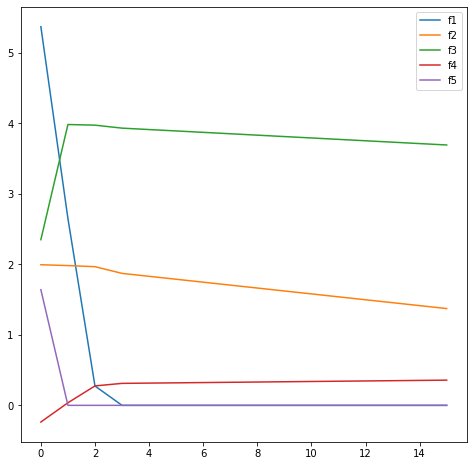

In [31]:
# Lasso
from sklearn import linear_model
X = df.values

alphas = np.arange(0.01,0.8,0.05)
params = []
for alpha in alphas:
    lasso  = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    lasso.fit(X,y)
    params.append(lasso.coef_)

params = np.array(params).T

plt.figure(figsize=(8,8))
for i in range(params.shape[0]):
    plt.plot(params[i,:],label=df.columns[i])

plt.legend()

### Kac tane parametrenin 0 degeri aldigina dikkat edin.

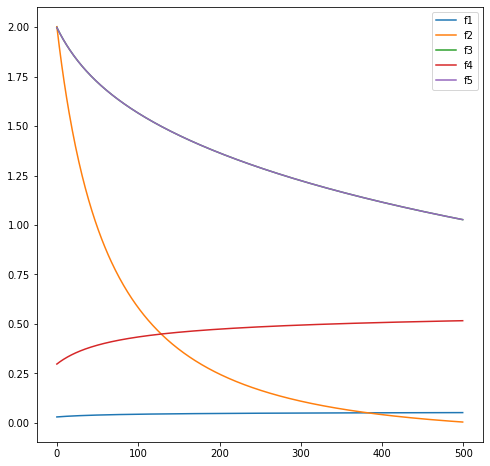

In [32]:
# Ridge
from sklearn import linear_model
X = df.values

alphas = np.arange(0.01,10000,20)
params = []
for alpha in alphas:
    ridge  = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X,y)
    params.append(ridge.coef_)

params = np.array(params).T

plt.figure(figsize=(8,8))
for i in range(params.shape[0]):
    plt.plot(params[i,:],label=df.columns[i])

plt.legend()

### LASSO ile Ridge arasindaki fark nedir?